### Enter your names:   _________

# Assignment 2
Elements of Data Science and Artificial Intelligence
<br>
Winter Semester 2024/2025
<br>
Saarland University

Prof. Dr. Ingmar Weber
<br>
Dr. Till Koebe
<br>
Prof. Dr. Bernt Schiele
<br>
Prof. Dr. Vera Demberg
<br>
Prof. Dr. Andrea Volkamer

In this assignment, we look at examples of how anonymous and aggregate Advertising Data, as well as freely available Satellite and Google Reviews Data, can be used to understand society. We will also look at some common issues when using data from such sources.

In case you have questions, feel free to use our [forum](https://edsai.cs.uni-saarland.de/).

**You are not allowed to use third-party libraries or additional Python modules unless otherwise specified.**

#### Submission Details

Upload your submission to our [CMS](https://cms.sic.saarland/edsai23_24/) in groups of two to three students until **November 17, 2024 17:59**. Late submissions will not be graded! Your submission should only contain this **.ipynb** file.

### Exercise 1: Data Sparsity (12 Points)

For this exercises, we collected so-called "audience estimates" from Meta's Marketing API. More specifically, we collected data on how many Facebook users are interested in Computer Science (Look at this [guide](https://worldbank.github.io/connectivity_mapping/facebook_nbs/pipeline.html) to know more). These estimates come with both lower and upper bounds for the "monthly active users", or MAUs.

The file 'fb_ads_data.csv' contains the estimates of users interested in different fields of study for all the states in Germany, further classified using the user's gender. We will use this data to understand the gender divide in the East and West of Germany for each field of study (according to Meta's/Facebook's inference).

Note that Meta and other advertising platforms only support two genders, male and female, for targeting, which does not reflect everyone's reality.

In [1]:
import pandas as pd

### 1 Point
* First, load the file containing data for all the states in Germany (fb_ads_data.csv).
* Calculate the average audience for each row i.e, ((lower bound+upper bound)/2) and store them as integers.

In [2]:
# Add your code here
fb_ads_data = pd.read_csv('fb_ads_data.csv')
average = (fb_ads_data['Audience Lower Bound'] + fb_ads_data['Audience Upper Bound'])/2
print(average)

0      3900.0
1      6550.0
2      4150.0
3      2300.0
4     16800.0
       ...   
91     1300.0
92     1000.0
93     1000.0
94     1000.0
95     1000.0
Length: 96, dtype: float64


### 1 Point

* Add a new column to the DataFrame named 'Part.' If the 'Region' is in east_states, the value should be 'East'; otherwise, it should be 'West'.
* Drop the column 'Region'.

In [3]:
# Add your code here

### 3 Points

* Calculate the total audience bounds (all lower, upper and average) for the 'East' and 'West' parts for different interest and gender combinations. (Hint: Use 'groupby').

In [4]:
# Add your code here

### 3 Points

* We now want to calculate the female to male ratio for each interest in both parts of Germany.
* To do so, first pivot the table so that the values of gender (female, male) are the new columns.
* Now, calculate the 'female to male ratio' (female/male) and add it as a new column.

In [5]:
# Add your code here

### 0 Points

* Now go through the csv file again and see if you can spot any issues in the data.
* Do you think the rows with both the upper and lower bound as 1000 are accurate?
* This happens if there are not enough users interested in a particular topic in that area, leading to Data Sparsity.

### 2 Points

Now repeat all the steps again, after removing the rows with Lower and Upper Bound as 1000.

In [6]:
# Add your code here

### 1 Point

* Based on all the experiments discussed above, how would you characterize the gender gap between Eastern and Western regions and across different fields of study? 
* How do the rows with both values as 1000 impact your analysis? Would they amplify or diminish the actual results?


### 1 Points

Keeping in mind the data collection using Facebook/Instagram, do you see any issues in using this data to understand biases beyond the platforms?


## Exercise 2: Data Disaggregation (8 Points)

In this study, we analyze the neighborhoods of Rotenbühl and Burbach in Saarbrücken using two distinct datasets to gain insights into different aspects of development. First, using the [Sentinel 2 Satellite Image Dataset](https://developers.google.com/earth-engine/datasets/catalog/sentinel-2), we collected data on the NIR (Near-Infrared Reflectance) bands (B8 and B8A) for the neighborhoods of Rotenbühl and Burbach in Saarbrücken, for 2023 (both individual and combined). These bands serve as indicators of healthy vegetation, where higher values suggest more abundant vegetation. These indices, along with others, are often used to assess environmental aspects of development in a region.

Additionally, we gathered Google reviews from users about establishments in these two areas. Typically, a higher number of reviews is seen as a sign of a more developed area with higher economic activity. 

We selected Rotenbühl and Burbach for their contrasting demographic profiles: [Rotenbühl is one of the areas with lowest population share in Saarbrücken, while Burbach has the highest](https://www.saarbruecken.de/media/download-649abac77a783). By comparing these areas, we aim to explore how satellite and Google reviews data correlate with socioeconomic factors and population demographics.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### 2 Points

* First, load the file containing the area wise band values for Rotenbühl and Burbach (mean_band_values.csv).
* Create a stacked bar graph that displays the mean B8A values for each month, for both regions.
* Calculate the median B8 mean of both the areas for 2023.

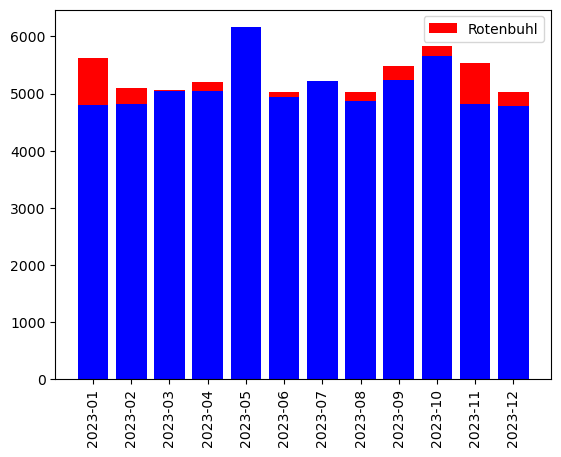

median per area:
 area
Burbach      4991.475142
Rotenbuhl    5118.209448
Name: B8A_mean, dtype: float64


In [8]:
# Add your code here
mean_band_values = pd.read_csv('mean_band_values.csv')
colors = {'Rotenbuhl': 'red', 'Burbach': 'blue'}
fig, ax = plt.subplots()
plt.bar(mean_band_values['month'], mean_band_values['B8A_mean'], color = mean_band_values['area'].map(colors))
plt.xticks(rotation=90)
plt.legend(['Rotenbuhl', 'Burbach'])
plt.show()
median_per_area = mean_band_values['B8A_mean'].groupby(mean_band_values['area']).median()
print('median per area:\n', median_per_area)

### 0.5 Point

Now load the file containing combined band values (combined_mean_bands_8B.csv) and calculate the median B8 mean for 2023.

In [9]:
# Add your code here
combined_mean_bands_B8 = pd.read_csv('combined_mean_bands_B8.csv')

### 1 Point

* Based on the indvidual medians, which area has healthier vegetation?
* Given that the combined median of both areas is higher than the medians of each area individually, might using this combined median impact any subsequent analysis or lead to potential misunderstandings of your results? 

Rotenbuhl has a media of 5118.209448 while Burbach has a median of 4991.475142, so Rotenbuhl has healtier vegetation.

### 0.5 Point

We now look at the google reviews left by users in these areas.

* Load the file containing the reviews for the two areas (reviews_data.csv). Try using different [delimeters](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) if you run into issues while loading the file.
* Calculate the total number of reviews for each area.

In [10]:
# Add your code here

reviews_data = pd.read_csv('reviews_data.csv', delimiter=';')  
reviews_data['review_count'].groupby(reviews_data['area']).sum()

area
Burbach      11323
Rotenbühl     3949
Name: review_count, dtype: int64

### 1 Point

We now look at the presence of non-German languages in the dataset.
* For each area, calculate the percentage of reviews in different languages using 'review_count' and add it as a column (percentage_review_lang).

In [11]:
# Add your code here
total_non_german_reviews = reviews_data['review_count'][reviews_data['org_review_lang'] != 'german'].groupby(reviews_data['area']).sum()
print(total_non_german_reviews/reviews_data['review_count'].groupby(reviews_data['area']).sum())

area
Burbach      0.296123
Rotenbühl    0.109395
Name: review_count, dtype: float64


### 1 Point

For each area, sort the dataframe in descending order of 'percentage_review_lang'.

In [12]:
# Add your code here


In [13]:
# Add your code here

### 1 Point

Considering that Rotenbühl has fewer reviews and a smaller diversity of languages in those reviews, while Burbach has a higher number of reviews and languages represented, what insights can we draw about the nature and characteristics of these two neighborhoods?

### 1 Point

* Do you see any issues with using satellite data for such tasks?
* Can the indices of vegetation index be used as an indicator for other variables such as wealth of an area or population density? Justify your answer with an example scenario. Give one scenario where it would lead to inaccurate results?
* Imagine you are using Google Review data to map different nationalities in Saarbrücken. What challenges would you face?

<!-- on data disaggrefatin and sate -->